In [108]:
from lxml import html
import requests
import pyquery
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

%matplotlib inline

In [133]:
def pitch_placement(heatmap):
    pitch = False
    while pitch == False:
        location = random.randint(0,len(heatmap)-1)
        prob = np.random.uniform(np.min(heatmap),np.max(heatmap))
        if prob < heatmap[location]: pitch = True  
    return location

In [111]:
#from http://crunchtimebaseball.com/baseball_map.html
#updates every day, so probably worth automizing that..
path_data = '../data/'
file_master_list = 'master_player_list.csv'
players_list = pd.read_csv(path_data+file_master_list)

In [124]:
print players_list.keys()[17] # fg_id -- Fangraphs ID
print players_list.values[:,18] # fg_name -- Fangraphs ID

fg_id
['A.J. Achter' 'A.J. Burnett' 'A.J. Cole' ..., 'Zeke Spruill'
 'Zelous Wheeler' 'Zoilo Almonte']


In [24]:
#Mike Trout, behind in count
url = 'http://www.fangraphs.com/zonegrid.aspx?playerid=10155&position=&ss=2016-04-03&se=2016-10-02&type=0&hand=R&count=behind&blur=0&grid=5&view=bat&pitch=&season=all'

In [98]:
#Mookie Betts
url = 'http://www.fangraphs.com/zonegrid.aspx?playerid=13611&position=&ss=2016-04-05&se=2016-10-02&type=0&hand=R&count=all&blur=0&grid=5&view=bat&pitch=&season=all'

In [99]:
url_fine = 'http://www.fangraphs.com/zonegrid.aspx?playerid=10155&position=&ss=2016-04-03&se=2016-10-02&type=0&hand=R&count=behind&blur=1&grid=10&view=bat&pitch=&season=all'

In [100]:
page = requests.get(url)

In [101]:
tree = html.fromstring(page.content)

In [125]:
heats = tree.xpath('//div[@class="hzstat"]/text()')
Npitch = tree.xpath('//div[@class="hzdem"]/text()')

In [126]:
len(Npitch)

25

In [127]:
heat1d = [float(i.split()[0]) for i in heats]
Npitch1d = [float(i.split()[0]) for i in Npitch]

In [128]:
heatmap = np.reshape(heat1d,[5,5])
pitchmap = np.reshape(Npitch1d,[5,5])

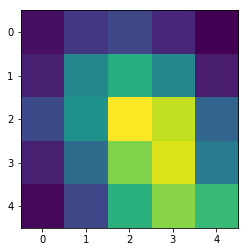

In [130]:
plt.imshow(heatmap)

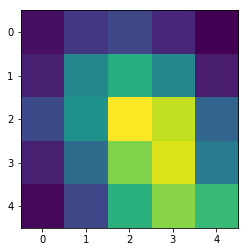

In [131]:
plt.imshow(pitchmap)

In [132]:
print np.sum(pitchmap)

2175.0
